大家好，我是方啸，这段是我负责的，有问题请直接联系我
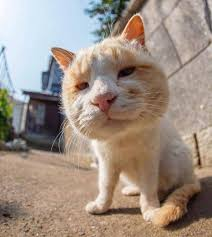

下面是一段示范代码，只要1分钟你就能轻松掌握

这里的sample_input就相当于张育豪那一段的结果，一个巨大的pandas dataframe

In [ ]:
from pandas import DataFrame as Df


sample_input = Df({
        "notesId": ["100-01", "100-02"],
        "SentenceId": ["100-01_0028", "100-02_0028"],
        "Sentence": ["Meds: lovastatin, fludrocortisone, celexa, reglan, proamatine, ultram, insulin, colace, ecasa",
                     "He takes Proza, Cardizem, Glucophage and Amaryl"],
        "Start": [228, 228],
        "End": [254, 254],
        "Section": ["Past medical history", "Past medical history"],
        "PrevSentId": ["100-01_0027", "100-02_0027"],
        "NextSentId": ["100-01_0029", "100-02_0029"],
    })
sample_input

,notesId,SentenceId,Sentence,Start,End,Section,PrevSentId,NextSentId
0,100-01,100-01_0028,"Meds: lovastatin, fludrocortisone, celexa, reg...",228,254,Past medical history,100-01_0027,100-01_0029
1,100-02,100-02_0028,"He takes Proza, Cardizem, Glucophage and Amaryl",228,254,Past medical history,100-02_0027,100-02_0029


下面是教学，一共4步
1. `from extract_word_RxNorm_features import RxNormExtractor`(记得把脚本放在同一目录下)
2. 实例化，把输入的dataframe作为参数
3. 运行方法 .extract()
4. 等待……漫长的等待，因为它这个要联网查询，一共有5个特征，而且是一个词一个词地查，所以会很慢。

In [ ]:
from extract_word_RxNorm_features import RxNormExtractor


rxet = RxNormExtractor(sample_input)
result = rxet.extract()
result

Querying Feature[filterByProperty]. Please wait...
Querying Feature[findRxcuiByString]. Please wait...
Querying Feature[getApproximateMatch]. Please wait...
Querying Feature[getDrugs]. Please wait...
Querying Feature[getSpellingSuggestions]. Please wait...


,SentenceId,words,filterByProperty,findRxcuiByString,getApproximateMatch,getDrugs,getSpellingSuggestions
0,100-01_0028,meds,None,NaN,197803,NaN,NaN
1,100-01_0028,:,None,NaN,NaN,NaN,NaN
2,100-01_0028,lovastatin,None,6472,6472,206257,lovastatin
3,100-01_0028,",",None,NaN,NaN,NaN,NaN
4,100-01_0028,fludrocortisone,None,4452,4452,313979,fludrocortisone
5,100-01_0028,",",None,NaN,NaN,NaN,NaN
6,100-01_0028,celexa,None,215928,215928,213344,celexa
7,100-01_0028,",",None,NaN,NaN,NaN,NaN
8,100-01_0028,reglan,None,9230,9230,207265,reglan
9,100-01_0028,",",None,NaN,NaN,NaN,NaN


因为跑一遍要花很长时间，所以建议跑完之后把结果保存下来！！！

In [ ]:
result.to_csv("result.csv")